In [1]:
toe_lasso = read.csv('../results_summary/sim_toe_lasso.txt', sep='\t')
toe_elnet = read.csv('../results_summary/sim_toe_elnet.txt', sep='\t')
toe_rf = read.csv('../results_summary/sim_toe_rf.txt', sep='\t')
toe_compLasso = read.csv('../results_summary/sim_toe_compLasso.txt', sep='\t')

toe_lasso$method = rep('lasso', dim(toe_lasso)[1])
toe_elnet$method = rep('elnet', dim(toe_elnet)[1])
toe_rf$method = rep('rf', dim(toe_rf)[1])
toe_compLasso$method = rep('compLasso', dim(toe_compLasso)[1])

In [2]:
dim(toe_lasso)
dim(toe_elnet)
dim(toe_rf)
dim(toe_compLasso)

[1] 80 14

[1] 80 14

[1] 80 16

[1] 80 14

In [3]:
toe_rf = toe_rf[!names(toe_rf)%in% c('OOB', 'OOB_mean', 'toeex')]
dim(toe_rf)

[1] 80 14

In [4]:
toe = rbind(toe_lasso, toe_elnet)
toe = rbind(toe, toe_rf)
toe = rbind(toe, toe_compLasso)
dim(toe)

[1] 320  14

In [5]:
toe[toe$num_select == 0, ]

,N,P,Corr,Ratio,Stab,MSE,FP,FN,num_select,FDR,MSE_mean,FP_mean,FN_mean,method
161,50,50,0.1,1,0,1.4 ( 0.06 ),1 ( 0 ),6 ( 0 ),0,NaN,1.40,1,6,rf
165,50,100,0.1,2,0,1.36 ( 0.06 ),1 ( 0 ),6 ( 0 ),0,NaN,1.36,1,6,rf
169,50,500,0.1,10,0,1.29 ( 0.05 ),1 ( 0 ),6 ( 0 ),0,NaN,1.29,1,6,rf
173,50,1000,0.1,20,0,1.35 ( 0.06 ),1 ( 0 ),6 ( 0 ),0,NaN,1.35,1,6,rf
177,50,50,0.3,1,0,1.22 ( 0.05 ),1 ( 0 ),6 ( 0 ),0,NaN,1.22,1,6,rf
181,50,100,0.3,2,0,1.15 ( 0.05 ),1 ( 0 ),6 ( 0 ),0,NaN,1.15,1,6,rf
185,50,500,0.3,10,0,1.14 ( 0.05 ),1 ( 0 ),6 ( 0 ),0,NaN,1.14,1,6,rf
189,50,1000,0.3,20,0,1.2 ( 0.05 ),1 ( 0 ),6 ( 0 ),0,NaN,1.20,1,6,rf
193,50,50,0.5,1,0,0.99 ( 0.05 ),1 ( 0 ),6 ( 0 ),0,NaN,0.99,1,6,rf
197,50,100,0.5,2,0,0.91 ( 0.04 ),1 ( 0 ),6 ( 0 ),0,NaN,0.91,1,6,rf


In [6]:
# fix false positives: when nothing was selected, then fp should be zero
# fp is now 1 due to length(setdiff(0/NA)) = 1 when actually should be 0 (in cv_sim_apply.R)
toe$FP_mean[toe$num_select ==0] = 0
write.table(toe, '../results_summary/table_toe_all.txt', sep='\t', row.names=F)

### data visulization

In [9]:
library(ggplot2)
toe$N = as.factor(toe$N)

### correlation 0.1

In [10]:
toe_sub1 = toe[toe$Corr %in% 0.1, ]

In [11]:
fig_num_select <- ggplot(toe_sub1, aes(fill=method, y=num_select, x=N)) + 
                    geom_bar(position="dodge", stat="identity") + 
                    ggtitle("Toeplitz Correlation 0.1") + xlab("Number of Samples") + ylab("Number of Selected Features") + 
                    theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                    facet_grid(~P, labeller = label_both) + ylim(0, 65) + 
                    scale_fill_brewer(palette="Dark2", name="Method",
                                      breaks=c("compLasso", "elnet", "lasso", "rf"),
                                      labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_toe_corr0.1_num_select.pdf', height=5, width=5.5)

In [12]:
fig_stab <- ggplot(toe_sub1, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.1") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) +
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_toe_corr0.1_Stab.pdf', height=5, width=5.5)

In [13]:
fig_mse <- ggplot(toe_sub1, aes(fill=method, y=MSE_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.1") + xlab("Number of Samples") + ylab("MSE") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) +
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_toe_corr0.1_MSE.pdf', height=5, width=5.5)

In [14]:
fig_FP <- ggplot(toe_sub1, aes(fill=method, y=FP_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.1") + xlab("Number of Samples") + ylab("#False Positives") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) + ylim(0, 72) + 
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_toe_corr0.1_FP.pdf', height=5, width=5.5)

In [15]:
fig_FN <- ggplot(toe_sub1, aes(fill=method, y=FN_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.1") + xlab("Number of Samples") + ylab("#False Negatives") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) +
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_toe_corr0.1_FN.pdf', height=5, width=5.5)

### Correlation 0.3

In [16]:
toe_sub3 = toe[toe$Corr %in% 0.3, ]

In [17]:
fig_num_select <- ggplot(toe_sub3, aes(fill=method, y=num_select, x=N)) + 
                    geom_bar(position="dodge", stat="identity") + 
                    ggtitle("Toeplitz Correlation 0.3") + xlab("Number of Samples") + ylab("Number of Selected Features") + 
                    theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                    facet_grid(~P, labeller = label_both) + ylim(0, 65) + 
                    scale_fill_brewer(palette="Dark2", name="Method",
                                      breaks=c("compLasso", "elnet", "lasso", "rf"),
                                      labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_toe_corr0.3_num_select.pdf', height=5, width=5.5)

In [18]:
fig_stab <- ggplot(toe_sub3, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.3") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) +
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_toe_corr0.3_Stab.pdf', height=5, width=5.5)

In [19]:
fig_mse <- ggplot(toe_sub3, aes(fill=method, y=MSE_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.3") + xlab("Number of Samples") + ylab("MSE") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) +
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_toe_corr0.3_MSE.pdf', height=5, width=5.5)

In [20]:
fig_FP <- ggplot(toe_sub3, aes(fill=method, y=FP_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.3") + xlab("Number of Samples") + ylab("#False Positives") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) + ylim(0, 72) + 
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_toe_corr0.3_FP.pdf', height=5, width=5.5)

In [21]:
fig_FN <- ggplot(toe_sub3, aes(fill=method, y=FN_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.3") + xlab("Number of Samples") + ylab("#False Negatives") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) +
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_toe_corr0.3_FN.pdf', height=5, width=5.5)

### Correlation 0.5

In [22]:
toe_sub5 = toe[toe$Corr %in% 0.5, ]

fig_num_select <- ggplot(toe_sub5, aes(fill=method, y=num_select, x=N)) + 
                    geom_bar(position="dodge", stat="identity") + 
                    ggtitle("Toeplitz Correlation 0.5") + xlab("Number of Samples") + ylab("Number of Selected Features") + 
                    theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                    facet_grid(~P, labeller = label_both) + ylim(0, 65) + 
                    scale_fill_brewer(palette="Dark2", name="Method",
                                      breaks=c("compLasso", "elnet", "lasso", "rf"),
                                      labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_toe_corr0.5_num_select.pdf', height=5, width=5.5)

fig_stab <- ggplot(toe_sub5, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.5") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) +
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_toe_corr0.5_Stab.pdf', height=5, width=5.5)

fig_mse <- ggplot(toe_sub5, aes(fill=method, y=MSE_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.5") + xlab("Number of Samples") + ylab("MSE") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) + ylim(0, 3)+
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_toe_corr0.5_MSE.pdf', height=5, width=5.5)

fig_FP <- ggplot(toe_sub5, aes(fill=method, y=FP_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.5") + xlab("Number of Samples") + ylab("#False Positives") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) + ylim(0, 72) + 
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_toe_corr0.5_FP.pdf', height=5, width=5.5)

fig_FN <- ggplot(toe_sub5, aes(fill=method, y=FN_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.5") + xlab("Number of Samples") + ylab("#False Negatives") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) +
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_toe_corr0.5_FN.pdf', height=5, width=5.5)

### Correlation 0.7

In [23]:
toe_sub7 = toe[toe$Corr %in% 0.7, ]

fig_num_select <- ggplot(toe_sub7, aes(fill=method, y=num_select, x=N)) + 
                    geom_bar(position="dodge", stat="identity") + 
                    ggtitle("Toeplitz Correlation 0.7") + xlab("Number of Samples") + ylab("Number of Selected Features") + 
                    theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                    facet_grid(~P, labeller = label_both) + ylim(0, 65) + 
                    scale_fill_brewer(palette="Dark2", name="Method",
                                      breaks=c("compLasso", "elnet", "lasso", "rf"),
                                      labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_toe_corr0.7_num_select.pdf', height=5, width=5.5)

fig_stab <- ggplot(toe_sub7, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.7") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) + ylim(0,1) + 
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_toe_corr0.7_Stab.pdf', height=5, width=5.5)

fig_mse <- ggplot(toe_sub7, aes(fill=method, y=MSE_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.7") + xlab("Number of Samples") + ylab("MSE") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) + ylim(0, 3)+
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_toe_corr0.7_MSE.pdf', height=5, width=5.5)

fig_FP <- ggplot(toe_sub7, aes(fill=method, y=FP_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.7") + xlab("Number of Samples") + ylab("#False Positives") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) + ylim(0, 72) + 
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_toe_corr0.7_FP.pdf', height=5, width=5.5)

fig_FN <- ggplot(toe_sub7, aes(fill=method, y=FN_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.7") + xlab("Number of Samples") + ylab("#False Negatives") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) +
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_toe_corr0.7_FN.pdf', height=5, width=5.5)

### Correlation 0.9

In [24]:
toe_sub9 = toe[toe$Corr %in% 0.9, ]

fig_num_select <- ggplot(toe_sub9, aes(fill=method, y=num_select, x=N)) + 
                    geom_bar(position="dodge", stat="identity") + 
                    ggtitle("Toeplitz Correlation 0.9") + xlab("Number of Samples") + ylab("Number of Selected Features") + 
                    theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                    facet_grid(~P, labeller = label_both) + ylim(0, 65) + 
                    scale_fill_brewer(palette="Dark2", name="Method",
                                      breaks=c("compLasso", "elnet", "lasso", "rf"),
                                      labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_toe_corr0.9_num_select.pdf', height=5, width=5.5)

fig_stab <- ggplot(toe_sub9, aes(fill=method, y=Stab, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.9") + xlab("Number of Samples") + ylab("Stability") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) + ylim(0,1) + 
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_toe_corr0.9_Stab.pdf', height=5, width=5.5)

fig_mse <- ggplot(toe_sub9, aes(fill=method, y=MSE_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.9") + xlab("Number of Samples") + ylab("MSE") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) + ylim(0, 3) +
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_toe_corr0.9_MSE.pdf', height=5, width=5.5)

fig_FP <- ggplot(toe_sub9, aes(fill=method, y=FP_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.9") + xlab("Number of Samples") + ylab("#False Positives") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) + ylim(0, 72) + 
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_toe_corr0.9_FP.pdf', height=5, width=5.5)

fig_FN <- ggplot(toe_sub9, aes(fill=method, y=FN_mean, x=N)) + 
                geom_bar(position="dodge", stat="identity") + 
                ggtitle("Toeplitz Correlation 0.9") + xlab("Number of Samples") + ylab("#False Negatives") + 
                theme(plot.title = element_text(hjust = 0.5), legend.position="top") + 
                facet_grid(~P, labeller = label_both) +
                scale_fill_brewer(palette="Dark2", name="Method",
                              breaks=c("compLasso", "elnet", "lasso", "rf"),
                              labels=c("Compositional Lasso", "Elastic Net", "Lasso", "Random Forest"))
ggsave('../figures_sim/figure_toe_corr0.9_FN.pdf', height=5, width=5.5)

### all together

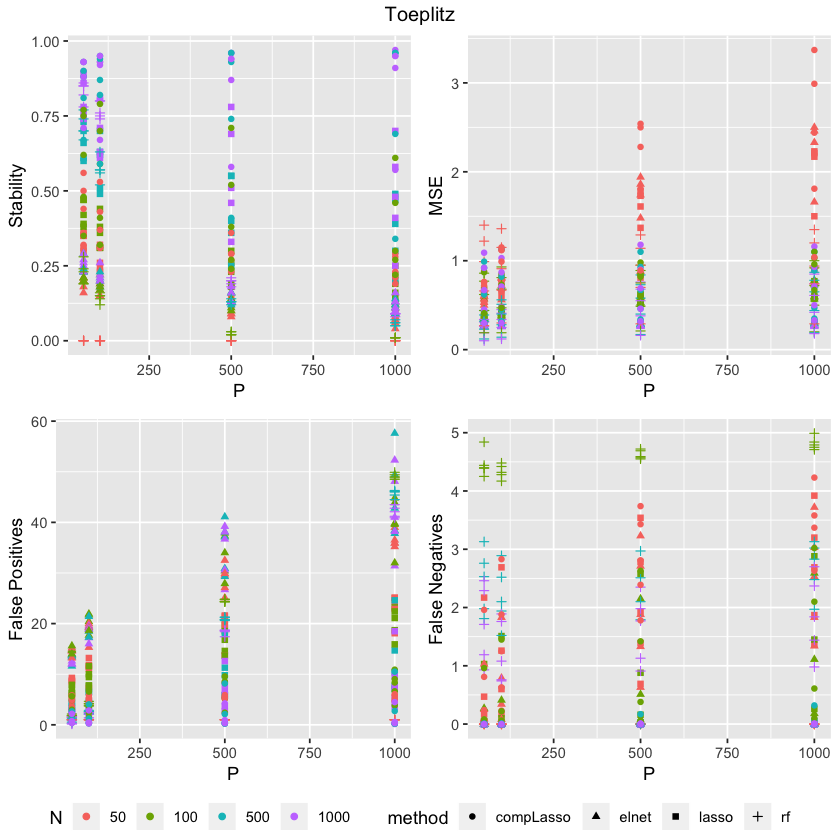

In [18]:
library(ggplot2)
library(ggpubr)
toe$N = as.factor(toe$N)
fig_toe_stab = ggplot(toe, aes(x=P, y=Stab, color=N)) + geom_point(aes(shape=method)) +ylab('Stability')
fig_toe_mse = ggplot(toe, aes(x=P, y=MSE_mean, color=N)) + geom_point(aes(shape=method)) + ylab('MSE')
fig_toe_fp = ggplot(toe, aes(x=P, y=FP_mean, color=N)) + geom_point(aes(shape=method)) + ylab('False Positives')
fig_toe_fn = ggplot(toe, aes(x=P, y=FN_mean, color=N)) + geom_point(aes(shape=method)) + ylab('False Negatives')
fig = ggarrange(fig_toe_stab, fig_toe_mse, fig_toe_fp, fig_toe_fn, ncol=2, nrow=2, 
          common.legend = TRUE, legend="bottom") 
fig = annotate_figure(fig, top = text_grob("Toeplitz"))
fig

In [11]:
ggexport(fig, filename = "../figures_sim/figure_toe_summary.pdf", height=8, width=8)

file saved to ../figures_sim/figure_toe_summary.pdf


### plot relationship between MSE, Stab, FP, FN

In [10]:
dat = read.csv('../results_summary/table_toe_all.txt', sep='\t')
head(dat)

N,P,Corr,Ratio,Stab,MSE,FP,FN,num_select,MSE_mean,FP_mean,FN_mean,method
50,50,0.1,1.00,0.36,0.62 ( 0.04 ),8.59 ( 0.46 ),0.02 ( 0.01 ),13.57,0.62,8.59,0.02,lasso
100,50,0.1,0.50,0.47,0.37 ( 0.01 ),6.3 ( 0.43 ),0 ( 0 ),11.30,0.37,6.30,0.00,lasso
500,50,0.1,0.10,0.73,0.28 ( 0 ),2.88 ( 0.21 ),0 ( 0 ),7.88,0.28,2.88,0.00,lasso
1000,50,0.1,0.05,0.89,0.27 ( 0 ),1.66 ( 0.11 ),0 ( 0 ),6.66,0.27,1.66,0.00,lasso
50,100,0.1,2.00,0.32,0.67 ( 0.05 ),11.84 ( 0.4 ),0 ( 0 ),16.84,0.67,11.80,0.00,lasso
100,100,0.1,1.00,0.44,0.4 ( 0.01 ),7.71 ( 0.56 ),0 ( 0 ),12.71,0.40,7.71,0.00,lasso


In [11]:
library(ggplot2)
library(gridExtra)
library(ggpubr)

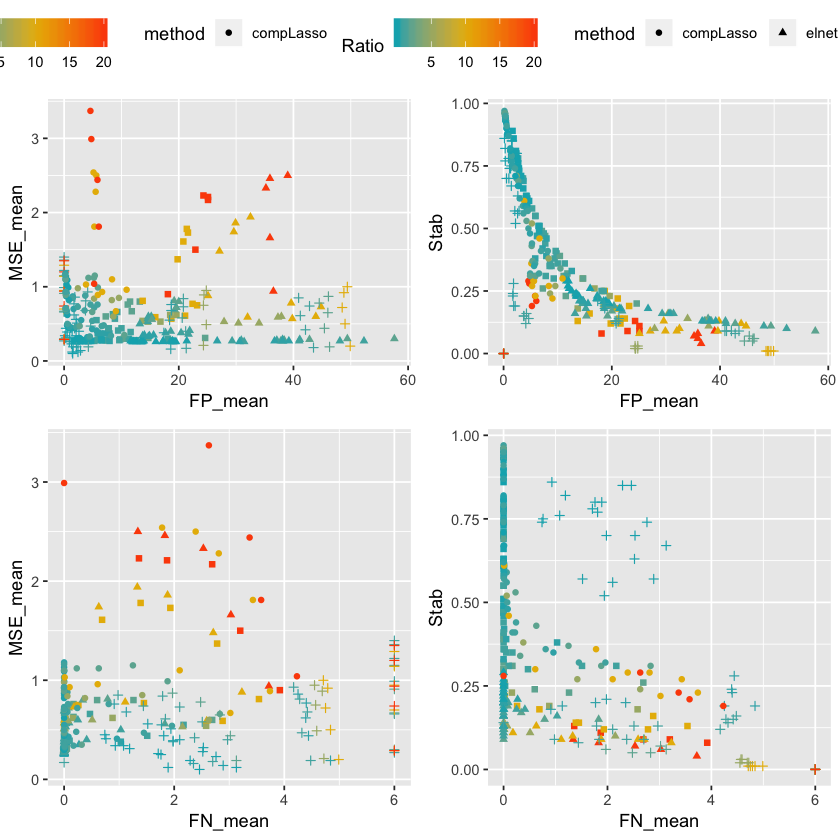

In [6]:
fig_mse_fp <- ggplot(dat, aes(x=FP_mean, y=MSE_mean, color=Ratio, shape=method)) + geom_point() + 
theme(legend.position="top") + scale_color_gradientn(colors = c("#00AFBB", "#E7B800", "#FC4E07"))
fig_stab_fp <- ggplot(dat, aes(x=FP_mean, y=Stab, color=Ratio, shape=method)) + geom_point() + 
theme(legend.position="top") + scale_color_gradientn(colors = c("#00AFBB", "#E7B800", "#FC4E07"))
fig_mse_fn <- ggplot(dat, aes(x=FN_mean, y=MSE_mean, color=Ratio, shape=method)) + geom_point() + 
theme(legend.position="none") + scale_color_gradientn(colors = c("#00AFBB", "#E7B800", "#FC4E07"))
fig_stab_fn <- ggplot(dat, aes(x=FN_mean, y=Stab, color=Ratio, shape=method)) + geom_point() + 
theme(legend.position="none") + scale_color_gradientn(colors = c("#00AFBB", "#E7B800", "#FC4E07"))
grid.arrange(fig_mse_fp, fig_stab_fp, fig_mse_fn, fig_stab_fn, ncol=2)

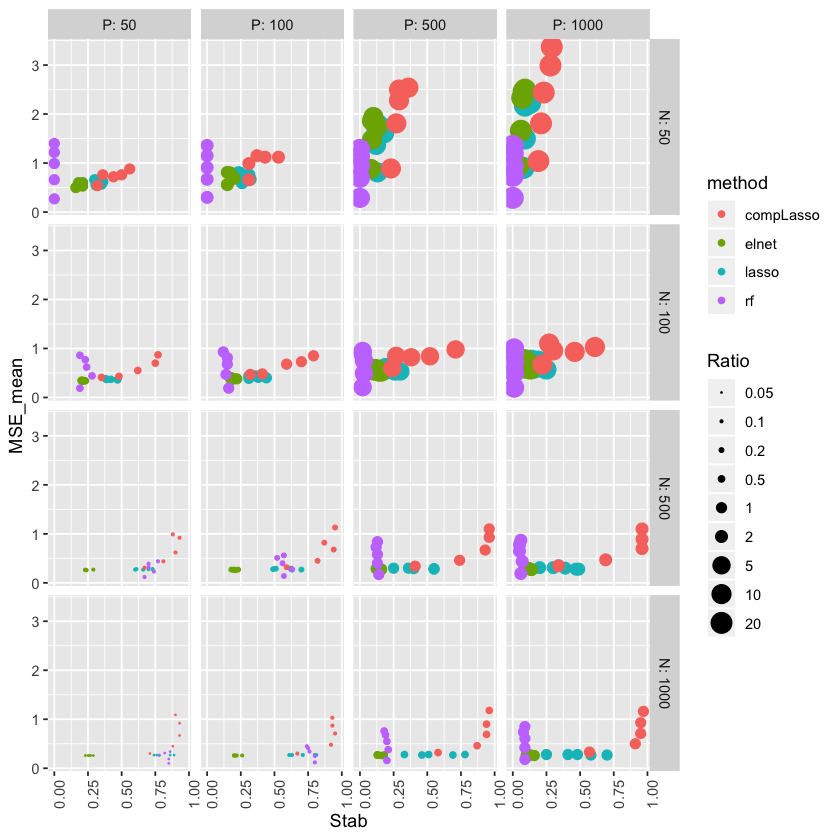

In [20]:
dat$Ratio = as.factor(dat$Ratio)
ggplot(dat, aes(x=Stab, y=MSE_mean, color=method, size=Ratio)) + geom_point() +
 scale_size_manual(values=c(0.1, 0.5, 1, 1.5, 2.5, 3, 4.5, 5, 5.5)) + 
       facet_grid(N ~ P, labeller = label_both) +
theme(axis.text.x = element_text(angle = 90))